In [2]:
#regression is the statistical technique which involves finding out the value of a depedent variable from set of independet variables.
#in linear regression, there is one dependent variable and 0+ independent variables
# also in LR it is assumed that there is a linear and additive relationship between the depedent and independent variables
# equation is y= c0 + m1x1+ m2x2 + m3x3 +....+m(n)x(n)

In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
#just to name the columns in the csv file. No need in practical exams
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv("housing.csv",header=None,delimiter=r"\s+",names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [35]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
# the last column is the target column and the rest columns are the independent columns
# we also need to split the data between train data and test data
from sklearn.model_selection import train_test_split

#indepnedent columns
x=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

#dependent/target column
y=df["MEDV"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=8)


In [7]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(x_test,y_test)

LinearRegression()

In [8]:
reg.coef_


array([-8.10309696e-02,  1.90038184e-02,  3.44033299e-02,  3.08106537e+00,
       -2.88747920e+01,  3.59538871e+00,  3.80263970e-02, -1.32546427e+00,
        4.37605682e-01, -1.82155638e-02, -1.11305979e+00,  4.44949955e-03,
       -4.96677465e-01])

In [9]:
reg.intercept_

46.248034056235134

In [55]:
y_pred=reg.predict(x_test)
print(y_pred)

[19.70804026 12.57151231 35.97077344 27.85697065 40.73054124 28.30522603
 14.05472794 35.08871637 29.7111669  34.70247056 14.34427091  9.22442608
 14.11116918 25.58487495 16.52751638 28.67982942 21.46188708 21.53766998
 20.58885207  8.25241628 22.0067616  22.99554296 29.14081376 34.1852394
 28.7195016  35.71076858  5.95949343 15.69586911 26.34218694 20.50990375
 34.26960491 17.3844274  19.94426241 21.48449609 23.77418649 27.53965147
 29.91353396 25.7707063  13.00615879 14.14470179 24.52525632 21.14757759
 35.71204811 34.14153539 24.61809386 16.18222003 19.04208646 20.55799344
 23.98593571 25.80427146 18.935392   17.20898428 29.17314729 18.2311244
 23.13113836 23.05039798 20.13968783  6.95122367 17.36554287 26.86352025
 22.45756038 22.21719538 19.14807146 11.88281078 15.79418693 14.03870393
 15.19733738 18.6923166  34.99283054 36.24445489 16.06044881 27.9168056
 30.70043833 29.87152064 21.89701675 28.47255422 27.66537956 17.46646759
 13.50685295 15.52592436 15.25643895  7.07642389 16.23

In [13]:
# find out the rmse value
# rmse value= sqrt(((y_test[i]-y_pred[i])^2)/size(y_test))
mse=np.square(np.subtract(y_test,y_pred)).mean()
mse
rmse=np.sqrt(mse)
rmse
#rmse measures the average difference between values predicted by a model and the actual values. 

4.6014918511898255

In [14]:
#can directly find out by the rmse by this method
rmseDirect=np.sqrt(mean_squared_error(y_test, y_pred))
rmseDirect

4.6014918511898255

In [60]:
#R2score
r2_score(y_test,y_pred)
# A high R-squared score, but not perfect, suggests that a large proportion of the variance in the actual values is explained by the predicted values. The predicted values provide a good approximation of the actual values.

0.7393495258344709

Text(0.5, 1.0, 'Regression Plot')

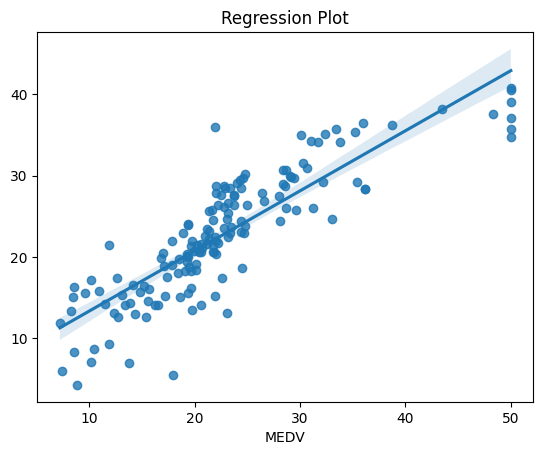

In [67]:
sns.regplot(x=y_test,y=y_pred)
plt.title('Regression Plot')
#dots are the test values, line is the y_pred values


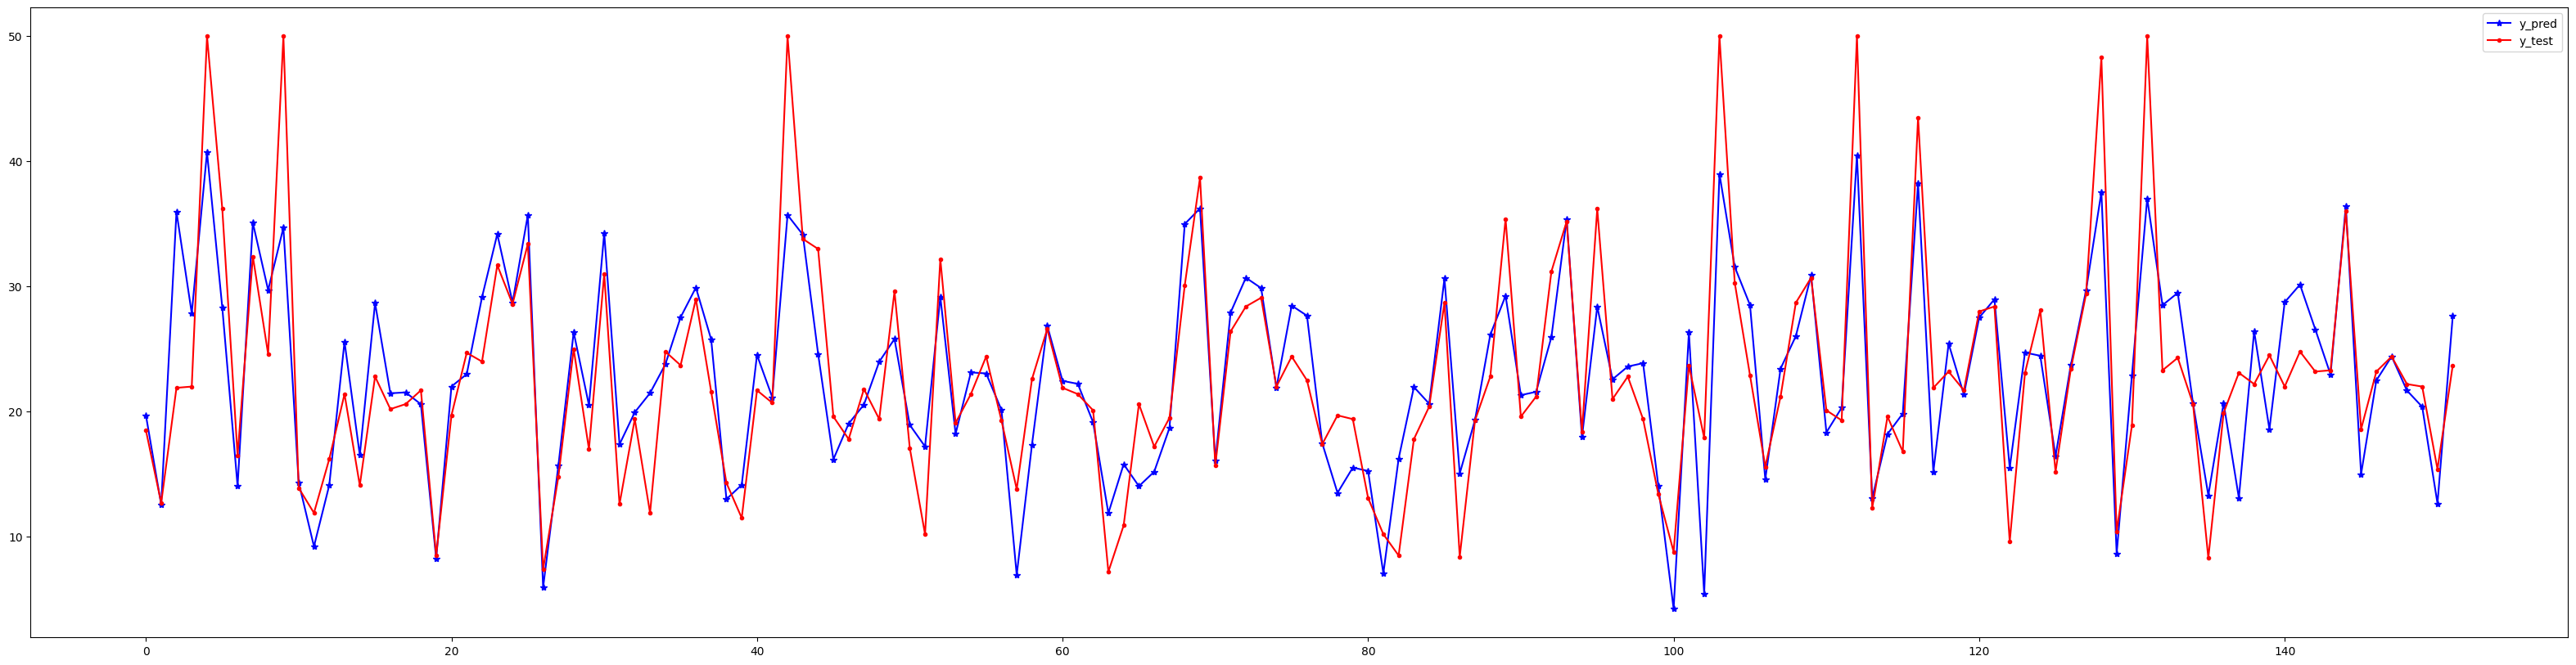

In [71]:
plt.figure(figsize=(40,10))
plt.plot(range(len(y_pred)), y_pred, color='blue', label='y_pred',marker="*")
plt.plot(range(len(y_test)), y_test, color='red', label='y_test',marker=".")
plt.legend()
# on y axis, prices of house are plotted
# on x axis, numbers of house are plotted